In [34]:
import matplotlib.pyplot as plt
# import matplotlib as mpl
import pandas as pd
import seaborn as sns
import sklearn
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import axes3d

%matplotlib inline

In [35]:
data = pd.read_csv('headbrain.csv')
print('Shape of Data', data.shape)
data.head()

Shape of Data (237, 4)


,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [36]:
X = data['Head Size(cm^3)'].values
Y = data['Brain Weight(grams)'].values

## Implementing Linear Regression from scratch

In [37]:
mean_x = np.mean(X)
mean_y = np.mean(Y)

m = len(X)

In [38]:
numer = 0
denom = 0

for i in range(m):
    numer += (X[i] - mean_x) * (Y[i] - mean_y)
    denom += (X[i] - mean_x) ** 2
    
b1 = numer/denom
b0 = mean_y - (b1 * mean_x)

In [39]:
print('b1 = ', b1, '\n', 'b0 = ', b0)

b1 =  0.26342933948939945 
 b0 =  325.57342104944223


### BrainWeight=325.573421049+0.263429339489∗HeadSize

In [40]:
max_x = np.max(X) + 100
min_x = np.min(X) - 100

# Calculating line values x and y
x = np.linspace(min_x, max_x, 1000)
y = b0 + b1 * x

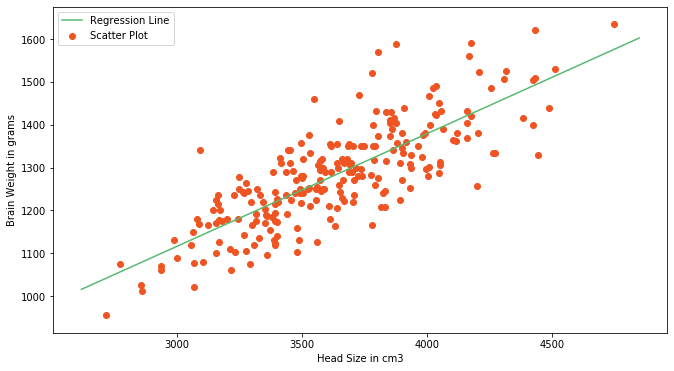

In [42]:
# Ploting Line
plt.figure(figsize=(11,6))
plt.plot(x, y, color='#58b970', label='Regression Line')
# Ploting Scatter Points
plt.scatter(X, Y, c='#ef5423', label='Scatter Plot')

plt.xlabel('Head Size in cm3')
plt.ylabel('Brain Weight in grams')
plt.legend()
plt.show()

In [13]:
# Calculating Root Mean Squares Error
rmse = 0
for i in range(m):
    y_pred = b0 + b1 * X[i]
    rmse += (Y[i] - y_pred) ** 2
rmse = np.sqrt(rmse/m)
print('RMSE = ', rmse)

RMSE =  72.1206213783709


In [14]:
# Calculating R2 score
ss_t = 0
ss_r = 0
for i in range(m):
    y_pred = b0 + b1 * X[i]
    ss_t += (Y[i] - mean_y) ** 2
    ss_r += (Y[i] - y_pred) ** 2
r2 = 1 - (ss_r/ss_t)
print('R2 Score = ', r2)

R2 Score =  0.6393117199570003


## Scikit-Learn Approach

In [16]:
# Cannot use Rank 1 matrix in scikit learn
X = X.reshape((m, 1))
# Creating Model
reg = LinearRegression()
# Fitting training data
reg = reg.fit(X, Y)
# Y Prediction
Y_pred = reg.predict(X)

# Calculating RMSE and R2 Score
mse = mean_squared_error(Y, Y_pred)
rmse = np.sqrt(mse)
r2_score = reg.score(X, Y)

print('RMSE = ', np.sqrt(mse))
print('R2 Score =', r2_score)

RMSE =  72.1206213783709
R2 Score = 0.639311719957


## Multiple Linear Regression

In [43]:
data = pd.read_csv('student.csv')
print('Shape of Data = ', data.shape)
data.head()

Shape of Data =  (1000, 3)


,Math,Reading,Writing
0,48,68,63
1,62,81,72
2,79,80,78
3,76,83,79
4,59,64,62


## Implementing from scratch

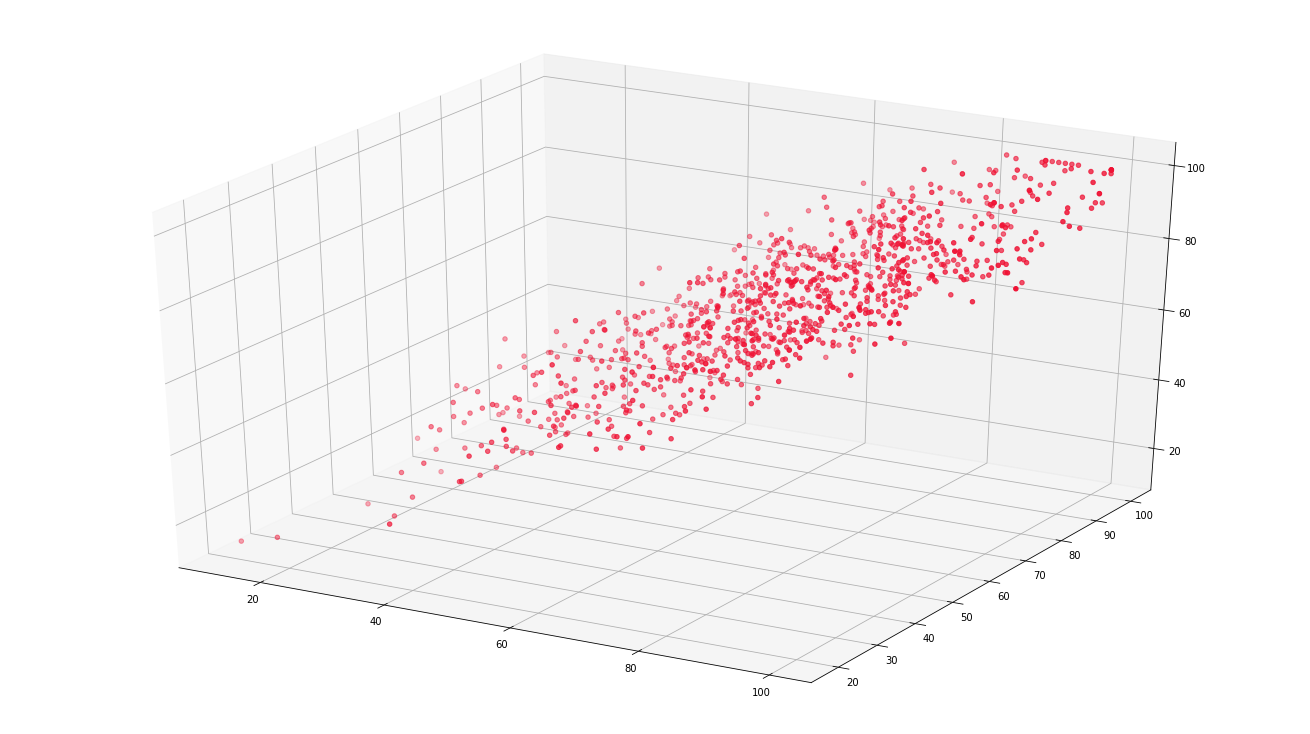

In [44]:
math = data['Math'].values
read = data['Reading'].values
write = data['Writing'].values

# Ploting the scores as scatter plot
fig = plt.figure(figsize=(18,10))
ax = Axes3D(fig)
ax.scatter(math, read, write, color='#ef1234')
# plt.figure(figsize=(18,10))
plt.show()

In [45]:
m = len(math)
x0 = np.ones(m)
X = np.array([x0, math, read]).T
# Initial Coefficients
B = np.array([0, 0, 0])
Y = np.array(write)
alpha = 0.0001

In [46]:
def cost_function(X, Y, B):
    m = len(Y)
    J = np.sum((X.dot(B) - Y) ** 2)/(2 * m)
    return J

In [47]:
inital_cost = cost_function(X, Y, B)
print(inital_cost)

2470.11


In [25]:
def gradient_descent(X, Y, B, alpha, iterations):
    cost_history = [0] * iterations
    m = len(Y)
    
    for iteration in range(iterations):
        # Hypothesis Values
        h = X.dot(B)
        # Difference b/w Hypothesis and Actual Y
        loss = h - Y
        # Gradient Calculation
        gradient = X.T.dot(loss) / m
        # Changing Values of B using Gradient
        B = B - alpha * gradient
        # New Cost Value
        cost = cost_function(X, Y, B)
        cost_history[iteration] = cost
        
    return B, cost_history

In [26]:
# 100000 Iterations
newB, cost_history = gradient_descent(X, Y, B, alpha, 100000)

# New Values of B
print(newB)

# Final Cost of new B
print(cost_history[-1])

[-0.47889172  0.09137252  0.90144884]
10.475123473539169


### S writing  =−0.47889172+0.09137252∗S math + 0.90144884∗S reading	

In [27]:
# Model Evaluation - RMSE
def rmse(Y, Y_pred):
    rmse = np.sqrt(sum((Y - Y_pred) ** 2) / len(Y))
    return rmse

# Model Evaluation - R2 Score
def r2_score(Y, Y_pred):
    mean_y = np.mean(Y)
    ss_tot = sum((Y - mean_y) ** 2)
    ss_res = sum((Y - Y_pred) ** 2)
    r2 = 1 - (ss_res / ss_tot)
    return r2

Y_pred = X.dot(newB)

print(rmse(Y, Y_pred))
print(r2_score(Y, Y_pred))

4.577143972727789
0.9097223273061553


In [28]:
# X and Y Values
X = np.array([math, read]).T
Y = np.array(write)

# Model Intialization
reg = LinearRegression()
# Data Fitting
reg = reg.fit(X, Y)
# Y Prediction
Y_pred = reg.predict(X)

# Model Evaluation
rmse = np.sqrt(mean_squared_error(Y, Y_pred))
r2 = reg.score(X, Y)

print(rmse)
print(r2)

4.572887051836439
0.9098901726717316


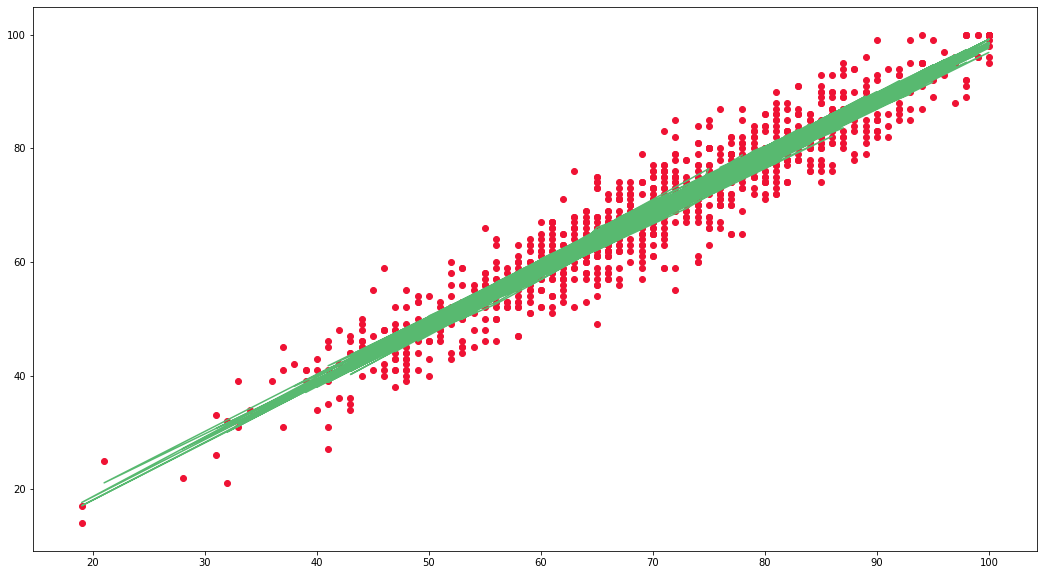

In [61]:
plt.figure(figsize=(18,10))
plt.plot(read,  Y_pred, color='#58b970', label='Regression Line')
plt.scatter(read, write, color='#ef1234', label='Data')
plt.show()